In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


✅ Dataset Loaded Successfully



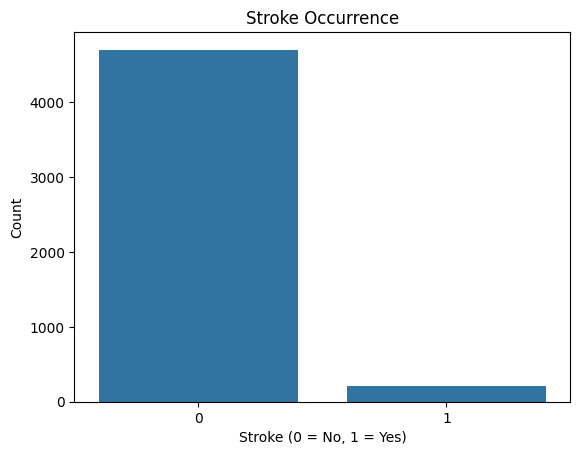

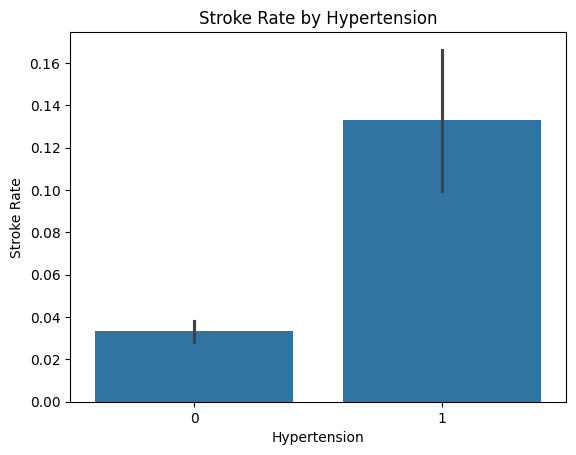

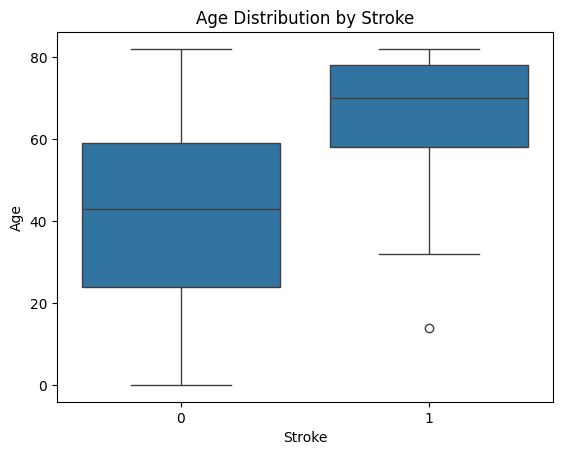


✅ Training Accuracy: 1.0000
✅ Testing Accuracy: 0.9460

Confusion Matrix:
 [[929   0]
 [ 53   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


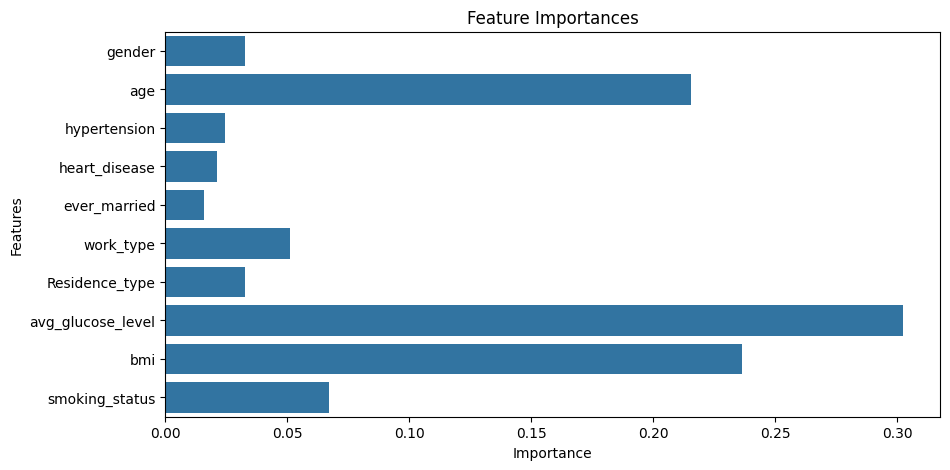

✅ Exported to stroke_risk_with_clusters.csv


In [3]:
# Stroke Risk Prediction & Lifestyle Clustering Project (Advanced Version with Simple Graphs)

# ------------------------------------------------------
# 📌 Overview:
# ------------------------------------------------------
# - Dataset: Stroke Prediction Dataset from Kaggle (ZIP file)
# - Task: Unzip + EDA (Simple Graphs) + Clustering + Classification
# - Skills: File Handling, Basic EDA, Clustering, Classification

# ------------------------------------------------------
# 📁 Import Libraries
# ------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ------------------------------------------------------
# 📦 Unzip and Load Dataset
# ------------------------------------------------------
zip_path = "/content/drive/MyDrive/kaggledataset123.zip"  # Change this to your actual zip filename if needed
extract_dir = "./extracted_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Find CSV file inside extracted folder
csv_file = None
for file in os.listdir(extract_dir):
    if file.endswith(".csv"):
        csv_file = os.path.join(extract_dir, file)
        break

if csv_file is None:
    raise FileNotFoundError("CSV file not found inside ZIP archive.")

data = pd.read_csv(csv_file)
print("✅ Dataset Loaded Successfully\n")

# ------------------------------------------------------
# 🧼 Data Cleaning & Preprocessing
# ------------------------------------------------------
data.drop('id', axis=1, inplace=True)
data.dropna(inplace=True)

le = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# ------------------------------------------------------
# 📊 Basic Graphs (Simple EDA)
# ------------------------------------------------------
sns.countplot(x='stroke', data=data)
plt.title("Stroke Occurrence")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

sns.barplot(x='hypertension', y='stroke', data=data)
plt.title("Stroke Rate by Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Stroke Rate")
plt.show()

sns.boxplot(x='stroke', y='age', data=data)
plt.title("Age Distribution by Stroke")
plt.xlabel("Stroke")
plt.ylabel("Age")
plt.show()

# ------------------------------------------------------
# 🧠 Clustering Lifestyle Types
# ------------------------------------------------------
features = data.drop('stroke', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['lifestyle_cluster'] = kmeans.fit_predict(features_scaled)

# ------------------------------------------------------
# 🔍 Classification to Predict Stroke Risk
# ------------------------------------------------------
X = data.drop(['stroke', 'lifestyle_cluster'], axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy Scores
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"\n✅ Training Accuracy: {train_accuracy:.4f}")
print(f"✅ Testing Accuracy: {test_accuracy:.4f}")

# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("\nClassification Report:\n", classification_report(y_test, test_preds))

# ------------------------------------------------------
# 📈 Feature Importance (Simple Bar Graph)
# ------------------------------------------------------
importances = clf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# ------------------------------------------------------
# 💾 Export Results
# ------------------------------------------------------
data.to_csv("stroke_risk_with_clusters.csv", index=False)
print("✅ Exported to stroke_risk_with_clusters.csv")
